# MNIST hand written digits classification
#Name: Nasifur Rahman
#Id: 20-43651-2 

In [40]:
from numpy import unique,argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


#Load MNIST dataset

In [41]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

#Normalize the value of Pixels

In [42]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

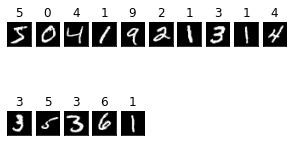

In [43]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
    ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap='gray')
    ax.set_title(y_train[i])

# Determine the shape of input images

In [44]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


#Define Model

In [45]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = img_shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [46]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1200)             

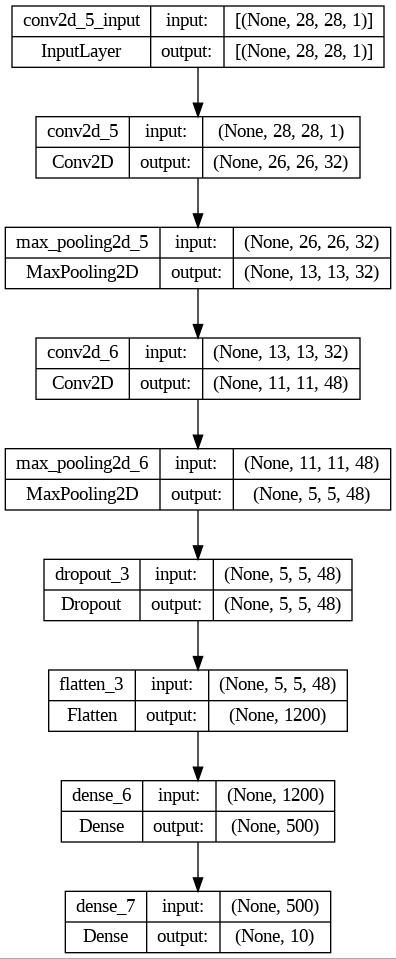

In [47]:
plot_model(model,'model.jpg',show_shapes=True)

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x=model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 43s - loss: 0.2485 - accuracy: 0.9228 - val_loss: 0.0559 - val_accuracy: 0.9837 - 43s/epoch - 103ms/step
Epoch 2/10
422/422 - 42s - loss: 0.0812 - accuracy: 0.9743 - val_loss: 0.0398 - val_accuracy: 0.9898 - 42s/epoch - 99ms/step
Epoch 3/10
422/422 - 43s - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.0345 - val_accuracy: 0.9890 - 43s/epoch - 102ms/step
Epoch 4/10
422/422 - 41s - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0334 - val_accuracy: 0.9905 - 41s/epoch - 98ms/step
Epoch 5/10
422/422 - 41s - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0282 - val_accuracy: 0.9915 - 41s/epoch - 98ms/step
Epoch 6/10
422/422 - 41s - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0294 - val_accuracy: 0.9912 - 41s/epoch - 98ms/step
Epoch 7/10
422/422 - 42s - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0273 - val_accuracy: 0.9922 - 42s/epoch - 100ms/step
Epoch 8/10
422/422 - 41s - loss: 0.0285 - accuracy: 0.9903 - val_loss: 0.0259 - val_accuracy: 0.9935 - 41s/epoch - 97ms/st

In [49]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=0)
print(f'Accuracy:{accuracy*100}')

Accuracy:99.19999837875366


# Normalise data

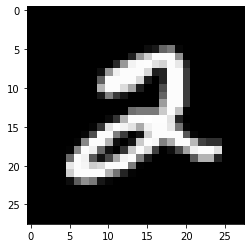

In [50]:
image = x_train[5]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [51]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p=model.predict([image])
print('Predict:{}'.format(argmax(p)))

1/1 [==============================] - 0s 69ms/step
Predict:2
